## Name: Asad Ansari

## 1. Setup
### Uncomment and run the line below if your environment is not already setup properly.

In [1]:
# uncomment the line below and run this cell to install required packages if
# you do not have them installed already.

# %pip install pandas numpy scipy matplotlib openpyxl seaborn pyarrow statsmodels bioinfokit


## 2. Process Data & Funtions

In [2]:
# Importing necessary libraries
import openpyxl  # For working with Excel files
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import scipy.stats as stats  # For statistical functions
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced visualizations
import statsmodels.api as sm  # For statistical models and tests
from statsmodels.formula.api import ols  # For ordinary least squares regression
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # For pairwise comparison of means
from bioinfokit.analys import stat  # For statistical analysis in bioinformatics
from statsmodels.graphics.factorplots import interaction_plot  # For interaction plots

####=====####
####SETUP####
####=====####

# Name of the data file
data_file_name = "INF2178_A2_data.xlsx"

# Reading the data file into a pandas DataFrame
df = pd.read_excel(data_file_name)

# Creating a copy of the original DataFrame
df_original = df

# Function to standardize column names using a names dictionary
def standardize_column_names(data_frame, names_dictionary):
    data_frame.rename(columns=names_dictionary, inplace=True)

# Function to convert columns to a specified data type
def convert_cols(data_frame, conversion_type, lst_of_cols):
    if conversion_type.lower() == "number":
        for col in lst_of_cols:
            data_frame[col] = pd.to_numeric(df[col], errors="coerce")
    if conversion_type.lower() == "datetime":
        for col in lst_of_cols:
            data_frame[col] = pd.to_datetime(df[col], errors="coerce")

# Function to generate alternative box plots
def generate_box_plots_alt(data_frame, list_of_continuous_vars, name_of_var, name_of_val, title, x_label, y_label, show_grid=False):
    # Melting the DataFrame to create a long format
    melted_df = df.melt(value_vars=list_of_continuous_vars, var_name=name_of_var, value_name=name_of_val)

    # Creating the box plot using seaborn
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=name_of_var, y=name_of_val, data=melted_df,
                flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor="black", markersize=5),
                medianprops=dict(color="red", marker="o", markerfacecolor="red", markeredgecolor="red", markersize=5),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                boxprops=dict(edgecolor="black", facecolor=(0.9, 0.9, 0.9)))

    # Adding title, x-label, y-label, and grid to the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(show_grid)

    # Displaying the plot
    plt.show()

# Function to generate box plots
def generate_box_plots(df, x_col, y_col, orient="h", title="Box Plot", x_label=None, y_label=None, show_grid=True):
    # Creating the box plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=df, orient=orient,
                flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor="black", markersize=5),
                medianprops=dict(color="red", marker="o", markerfacecolor="red", markeredgecolor="red", markersize=5),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                boxprops=dict(edgecolor="black", facecolor=(0.9, 0.9, 0.9)))
    # Adding title, x-label, y-label, and grid to the plot
    plt.title(title)
    plt.xlabel(x_label if x_label else x_col)
    plt.ylabel(y_label if y_label else y_col)
    plt.grid(show_grid)
    # Displaying the plot
    plt.show()

# Function to get descriptive statistics of the DataFrame
def get_descriptive_stats(data_frame, all=False, lst_of_columns=[]):
    if all == True:
        # Getting descriptive statistics for all columns
        descriptive_stats = df.describe(include="all")
        descriptive_stats_df = descriptive_stats.transpose()
    if all == False:
        # Getting descriptive statistics for specified columns
        descriptive_stats = df[lst_of_columns].describe()
        descriptive_stats_df = descriptive_stats.transpose()
    return descriptive_stats_df

# Function to check if a column follows a normal distribution
def is_col_normal(data_frame, col_name):
    cleaned_df = data_frame[col_name]
    plt.figure(figsize=(12, 5))

    # Creating a histogram of the column
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_df, kde=True, bins=30)
    plt.title(f"Histogram of {col_name}")

    # Creating a box plot of the column
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_df)
    plt.title(f"Boxplot of {col_name}")

    # Calculating mean, median, quartiles, and IQR
    mean = cleaned_df.mean()
    median = cleaned_df.median()
    quartiles = cleaned_df.quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    stats = {"Mean":mean,"Median":median,"Quartile1":quartiles[0.25],"Quartile3":quartiles[0.75],"IQR":iqr}

    plt.tight_layout()
    plt.show()
    return stats

# Dictionary to standardize column names
new_col_names = {
    "_id": "ID",
    "LOC_ID": "LOC_ID",
    "LOC_NAME": "LOC_NAME",
    "AUSPICE": "AUSPICE",
    "ADDRESS": "ADDRESS",
    "PCODE": "POSTAL_CODE",
    "ward": "WARD",
    "bldg_type": "BUILDING_TYPE",
    "BLDGNAME": "BUILDING_NAME",
    "IGSPACE": "IG_SPACE",
    "TGSPACE": "TG_SPACE",
    "PGSPACE": "PG_SPACE",
    "KGSPACE": "KG_SPACE",
    "SGSPACE": "SG_SPACE",
    "TOTSPACE": "TOTAL_SPACE",
    "subsidy": "SUBSIDY",
    "cwelcc_flag": "CWELCC_FLAG"
}

# Standardizing column names
standardize_column_names(df, new_col_names)

# Converting columns to numeric data type
convert_cols(df, "number", ["IG_SPACE", "TG_SPACE", "PG_SPACE", "KG_SPACE", "SG_SPACE", "TOTAL_SPACE"])

# Displaying the first few rows of the DataFrame
df.head()


,ID,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,POSTAL_CODE,WARD,BUILDING_TYPE,BUILDING_NAME,IG_SPACE,TG_SPACE,PG_SPACE,KG_SPACE,SG_SPACE,TOTAL_SPACE,SUBSIDY,CWELCC_FLAG
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


# 3. EDA

In [3]:
# Find the number of rows and columns in the dataset
num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of rows:", num_rows, "\nNumber of columns:", num_columns)


Number of rows: 1063 
Number of columns: 17


In [4]:
# Check to see if there are any duplicate records
duplicate_LOC_ID = df[df.duplicated(["LOC_ID"], keep=False)]
num_duplicate_LOC_ID = duplicate_LOC_ID.shape[0]
num_duplicate_LOC_ID, duplicate_LOC_ID


(0,
 Empty DataFrame
 Columns: [ID, LOC_ID, LOC_NAME, AUSPICE, ADDRESS, POSTAL_CODE, WARD, BUILDING_TYPE, BUILDING_NAME, IG_SPACE, TG_SPACE, PG_SPACE, KG_SPACE, SG_SPACE, TOTAL_SPACE, SUBSIDY, CWELCC_FLAG]
 Index: [])

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


ID                 0
LOC_ID             0
LOC_NAME           0
AUSPICE            0
ADDRESS            0
POSTAL_CODE        0
WARD               0
BUILDING_TYPE      0
BUILDING_NAME    348
IG_SPACE           0
TG_SPACE           0
PG_SPACE           0
KG_SPACE           0
SG_SPACE           0
TOTAL_SPACE        0
SUBSIDY            0
CWELCC_FLAG        0
dtype: int64

In [6]:
descriptive_stats_all_cols_df = get_descriptive_stats(df, True)
display(descriptive_stats_all_cols_df)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1063.0,NaN,NaN,NaN,532.0,307.005972,1.0,266.5,532.0,797.5,1063.0
LOC_ID,1063.0,NaN,NaN,NaN,8087.888053,5151.252693,1013.0,1862.0,8826.0,13245.0,14504.0
LOC_NAME,1063,1058,Blue Bell Academy Inc.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUSPICE,1063,3,Non Profit Agency,703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,1063,1032,115 WINONA DR,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POSTAL_CODE,1063,998,M4C 4X7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WARD,1063.0,NaN,NaN,NaN,12.511759,7.03205,1.0,6.0,12.0,19.0,25.0
BUILDING_TYPE,1063,30,Public Elementary School,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING_NAME,715,691,Apartment Building,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IG_SPACE,1063.0,NaN,NaN,NaN,3.896519,6.091782,0.0,0.0,0.0,10.0,30.0


In [7]:
continous_var_columns = ["IG_SPACE", "TG_SPACE", "PG_SPACE", "KG_SPACE", "SG_SPACE", "TOTAL_SPACE"]
descriptive_stats_continous_df = get_descriptive_stats(df, False, continous_var_columns)
display(descriptive_stats_continous_df)


,count,mean,std,min,25%,50%,75%,max
IG_SPACE,1063.0,3.896519,6.091782,0.0,0.0,0.0,10.0,30.0
TG_SPACE,1063.0,11.600188,12.088152,0.0,0.0,10.0,15.0,90.0
PG_SPACE,1063.0,24.258702,18.577416,0.0,16.0,24.0,32.0,144.0
KG_SPACE,1063.0,14.257761,20.493290,0.0,0.0,0.0,26.0,130.0
SG_SPACE,1063.0,21.661336,30.423503,0.0,0.0,0.0,30.0,285.0
TOTAL_SPACE,1063.0,75.674506,47.816518,6.0,43.0,62.0,97.0,402.0


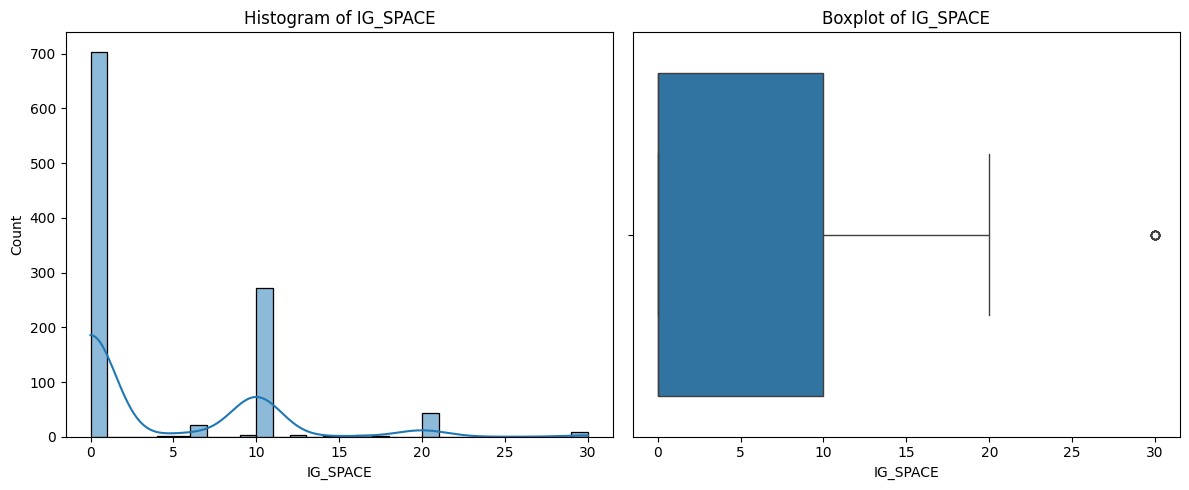

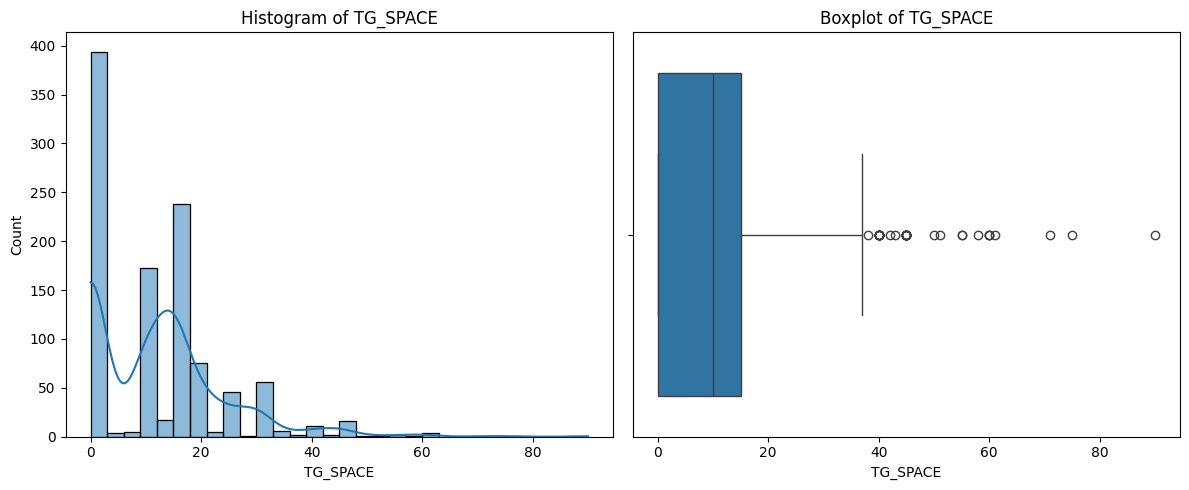

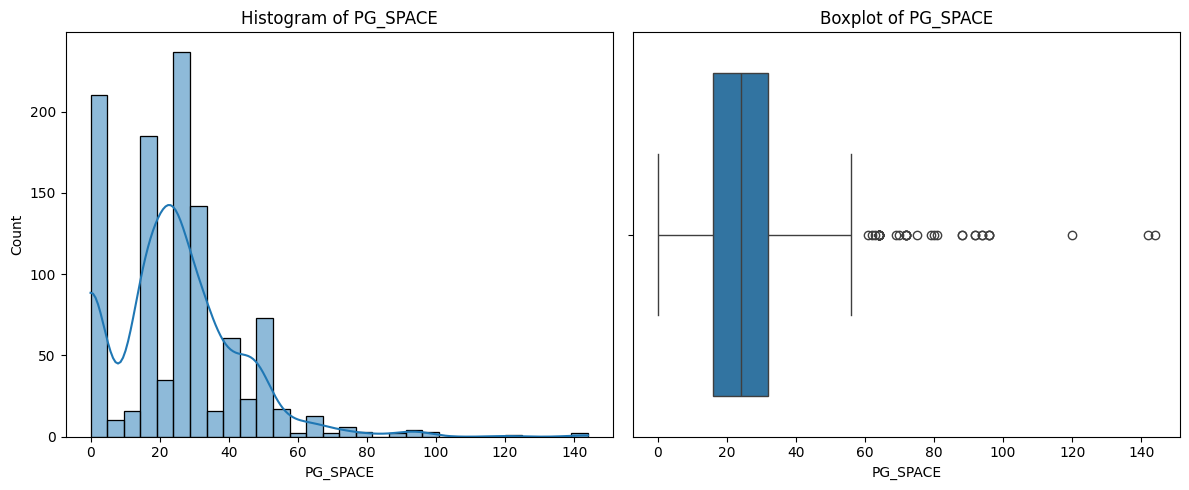

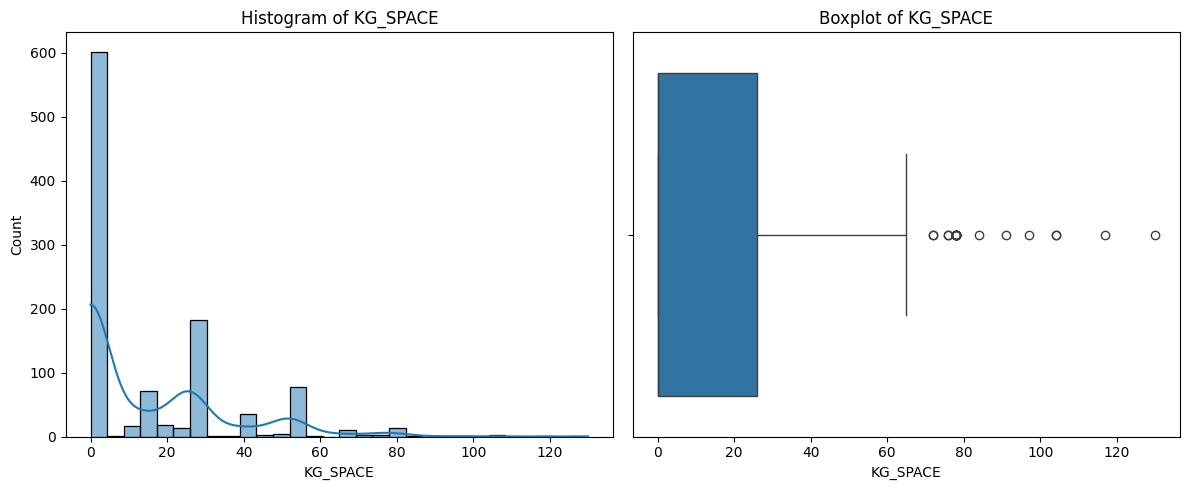

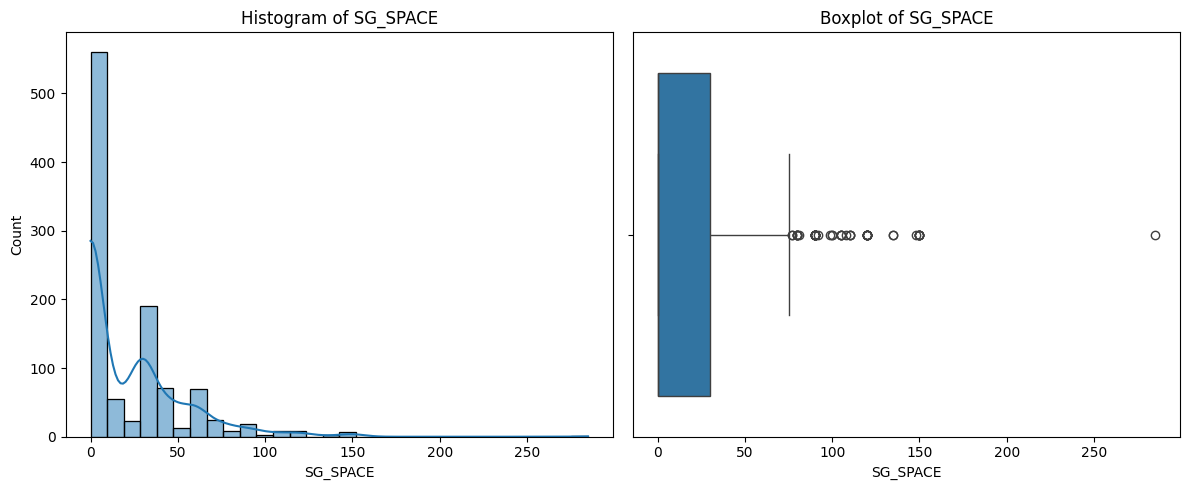

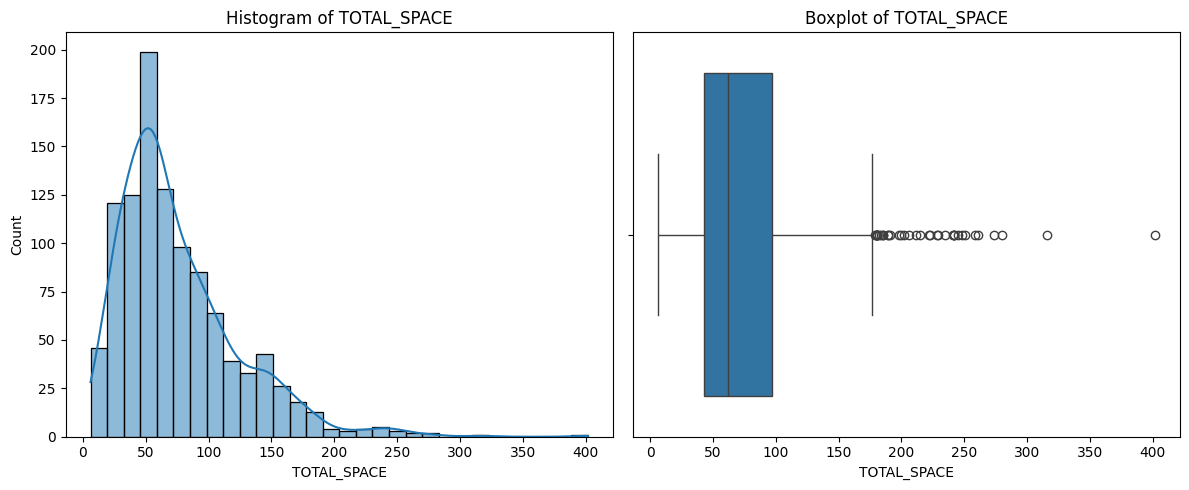

In [8]:
continous_var_columns = ["IG_SPACE", "TG_SPACE", "PG_SPACE", "KG_SPACE", "SG_SPACE", "TOTAL_SPACE"]

for continous_var in continous_var_columns:
    is_col_normal(df, continous_var)


In [9]:
# 4. One-way ANOVA


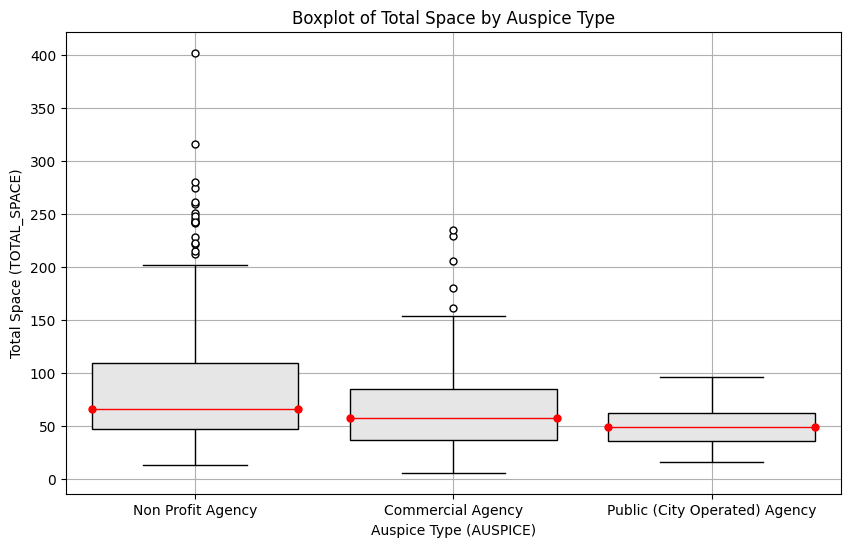

In [10]:
generate_box_plots(df, x_col="AUSPICE", y_col="TOTAL_SPACE", orient="v",
                   title="Boxplot of Total Space by Auspice Type",
                   x_label="Auspice Type (AUSPICE)", y_label="Total Space (TOTAL_SPACE)", show_grid=True)


In [11]:
# Normality tests for each auspice type
auspice_types = df["AUSPICE"].unique()
normality_results_auspice = {auspice: stats.shapiro(df[df["AUSPICE"] == auspice]["TOTAL_SPACE"].dropna()) for auspice in auspice_types}

# Levene's test for homogeneity of variances
# Homogeneity of variances test across auspice types
total_space_samples_auspice = [df[df["AUSPICE"] == auspice]["TOTAL_SPACE"].dropna() for auspice in auspice_types]

# The star is python's spread opeartor similar to ... in JavaScript
levene_test_result_auspice = stats.levene(*total_space_samples_auspice)

# Create dataframes to have a nice tabular display
normality_result_auspice_df = pd.DataFrame.from_dict(normality_results_auspice, orient="index", columns=["Shapiro Statistic", "p-value"])

normality_result_auspice_df.index.name = "Auspice Type"

levene_result_auspice_df = pd.DataFrame([levene_test_result_auspice], columns=["Levene Statistic", "p-value"], index=["Levene Test"])

# Print Results
display(normality_result_auspice_df)
display(levene_result_auspice_df)


,Shapiro Statistic,p-value
Auspice Type,,
Non Profit Agency,0.891758,8.340134e-22
Commercial Agency,0.923831,1.013774e-11
Public (City Operated) Agency,0.951491,9.225924e-02


,Levene Statistic,p-value
Levene Test,17.927069,2.203689e-08


In [12]:
# Levene test using bioinfokit library
one_way_df_melted = df.melt(id_vars="AUSPICE", value_vars="TOTAL_SPACE", var_name="variable", value_name="value")

res = stat()
res.levene(df=one_way_df_melted, res_var="value", xfac_var="AUSPICE")
res.levene_summary


,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [13]:
# ANOVA using sm.stats
model_auspice_type = ols("TOTAL_SPACE ~ C(AUSPICE)", data=df).fit()
anova_table = sm.stats.anova_lm(model_auspice_type, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [14]:
# ANOVA using bioinfokit
df_melt = df.melt(id_vars=['AUSPICE'], value_vars=['TOTAL_SPACE'], var_name='treatments', value_name='value')

res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(AUSPICE)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [15]:
# Tukey HSD using statsmodel library
tukey_result = pairwise_tukeyhsd(endog=df_melt['value'], groups=df_melt['AUSPICE'], alpha=0.05)

tukey_result.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency,Non Profit Agency,17.1194,0.0,9.7037,24.5351,True
Commercial Agency,Public (City Operated) Agency,-17.2152,0.0779,-35.8832,1.4528,False
Non Profit Agency,Public (City Operated) Agency,-34.3346,0.0,-52.4448,-16.2244,True


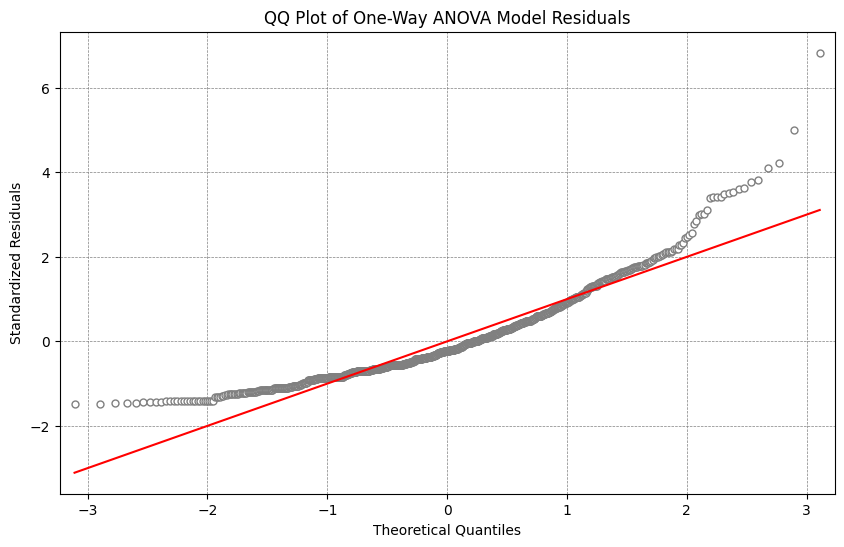

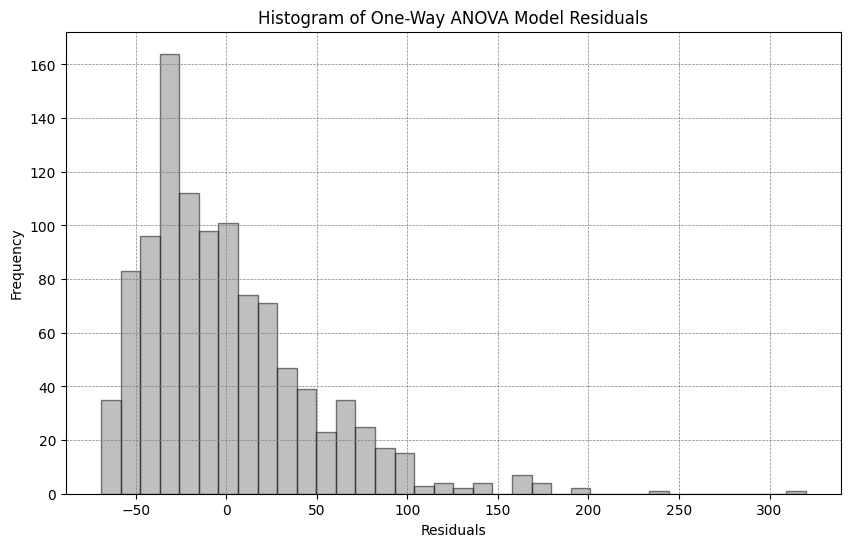

In [16]:
residuals = model_auspice_type.resid

# QQ Plot for Residuals
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
sm.qqplot(residuals, line="s", fit=True, ax=ax)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("QQ Plot of One-Way ANOVA Model Residuals")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")
for line in ax.lines:
    line.set_markerfacecolor("white")
    line.set_markeredgecolor("gray")
    line.set_markeredgewidth(1.0)
    line.set_markersize(5)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins="auto", histtype="bar", ec="k", color="gray", alpha=0.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of One-Way ANOVA Model Residuals")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")
plt.show()


In [17]:
w, pvalue = stats.shapiro(model_auspice_type.resid)
print(f"Shapiro-Wilk Test:\nTest statistic: {w}\np-value: {pvalue}")


Shapiro-Wilk Test:
Test statistic: 0.9017748243686026
p-value: 1.4961802044487592e-25


# 5. Two-way ANOVA

In [18]:
# Check number of unique building types
unique_building_types = df["BUILDING_TYPE"].unique()
print(unique_building_types)
len(unique_building_types)


['Public Elementary School' 'Catholic Elementary School' 'Other'
 'High Rise Apartment' 'Community College/University' 'Public High School'
 'House' 'Purpose Built' 'Synagogue' 'Community/Recreation Centre'
 'Public (school closed)' 'Office Building'
 'Multi Human Services Facility' 'Place of Worship' 'Industrial Building'
 'Community/Rec Centre - City' 'Catholic High School' 'Church'
 'Commercial Building' 'Catholic Elementary (French)'
 'Public Elementary (French)' 'Hospital/Health Centre'
 'Low Rise Apartment' 'Public Middle School'
 'Community/Rec Centre - Private' 'Community Rec/Centre - Board Run'
 'Private Elementary School' 'Community/Rec Centre AOCC'
 'Community Health Centre' 'Public Elementary Special']


30

In [19]:
# Group building types using a map
schools = [
    "Public Elementary School",
    "Catholic Elementary School",
    "Public High School",
    "Public Middle School",
    "Public (school closed)",
    "Catholic Elementary (French)",
    "Private Elementary School",
    "Public Elementary Special",
    "Public Elementary (French)",
    "Catholic High School",
    "Community College/University"
]

other = [
    "Commercial Building",
    "Industrial Building",
    "Multi Human Services Facility",
    "Purpose Built",
    "Office Building",
    "House",
    "Other",
    "Hospital/Health Centre"
]

places_of_worship = [
    "Place of Worship",
    "Synagogue",
    "Church"
]

community_centres = [
    "Community/Rec Centre - Private",
    "Community Rec/Centre - Board Run",
    "Community/Rec Centre AOCC",
    "Community Health Centre",
    "Community/Rec Centre - City",
    "Community/Recreation Centre"
]

apartments = [
    "High Rise Apartment",
    "Low Rise Apartment"
]

building_class_map = {**{b: "School" for b in schools},
                      **{b: "Other" for b in other},
                      **{b: "Place of Worship" for b in places_of_worship},
                      **{b: "Community Centre" for b in community_centres},
                      **{b: "Apartment" for b in apartments}}

df["BUILDING_CLASS"] = df["BUILDING_TYPE"].map(building_class_map)


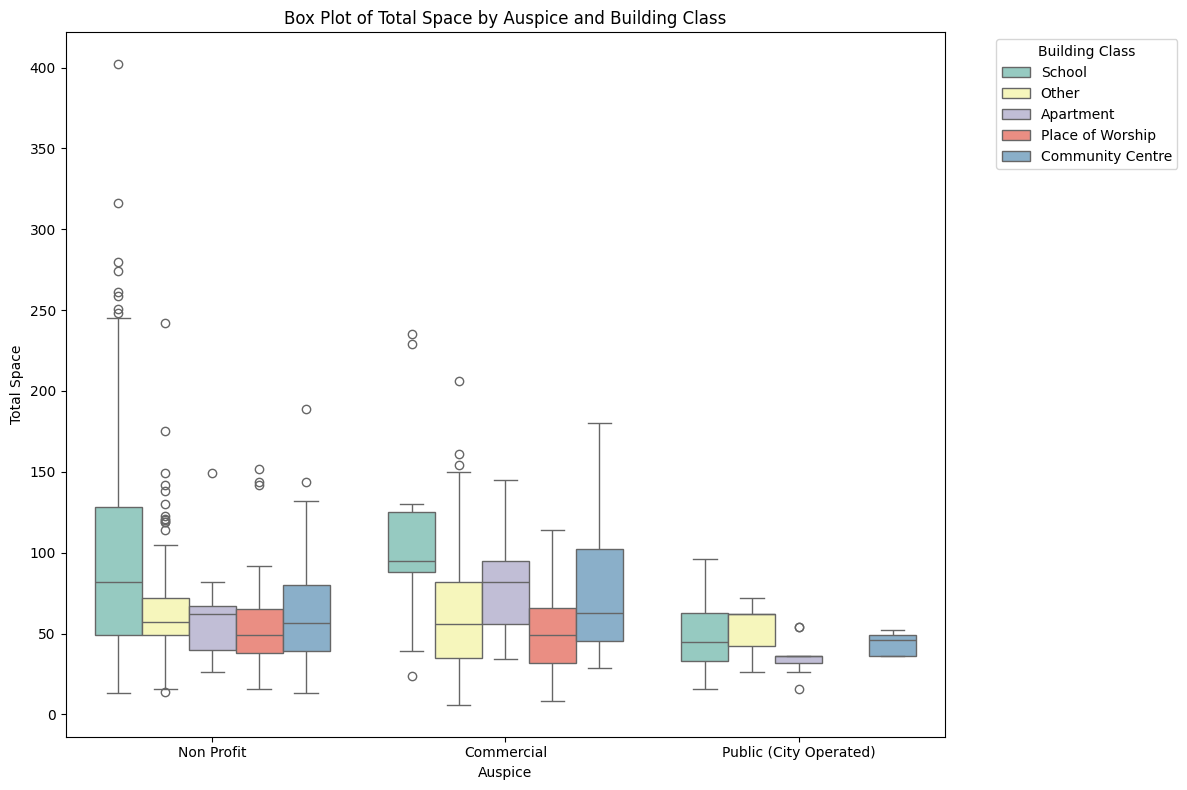

In [20]:
two_way_df_melted = pd.melt(df, id_vars=["AUSPICE", "BUILDING_CLASS"], value_vars=["TOTAL_SPACE"], var_name="Measurement", value_name="Total Space")

two_way_df_melted["AUSPICE"] = two_way_df_melted["AUSPICE"].str.replace(" Agency", "")

plt.figure(figsize=(12, 8))
sns.boxplot(x="AUSPICE", y="Total Space", hue="BUILDING_CLASS", data=two_way_df_melted, palette="Set3")

plt.title("Box Plot of Total Space by Auspice and Building Class")
plt.xlabel("Auspice")
plt.ylabel("Total Space")
plt.legend(title="Building Class", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [21]:
two_way_anova_model = ols("TOTAL_SPACE ~ C(AUSPICE) + C(BUILDING_CLASS) + C(AUSPICE):C(BUILDING_CLASS)", data=df).fit()

residuals = two_way_anova_model.resid

w, pvalue = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test:\nTest statistic: {w}\np-value: {pvalue}")


Shapiro-Wilk Test:
Test statistic: 0.928993915514909
p-value: 5.020620106586926e-22


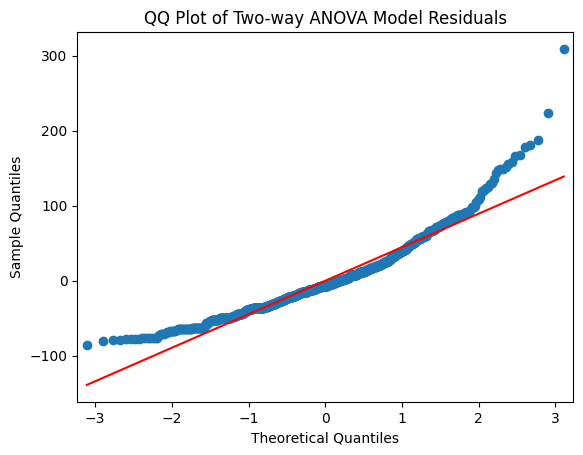

In [22]:
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Two-way ANOVA Model Residuals")
plt.show()


In [23]:
df_melted = pd.melt(df, id_vars=["AUSPICE", "BUILDING_CLASS"], value_vars=["TOTAL_SPACE"], var_name="Measurement", value_name="Total Space")

groups = df_melted.groupby(["AUSPICE", "BUILDING_CLASS"])["Total Space"]

stat, p = stats.levene(*[group for name, group in groups])
print(f"Levene's Test:\nTest statistic: {stat}\np-value: {p}")


Levene's Test:
Test statistic: 10.634629477680763
p-value: 1.63118605475703e-21


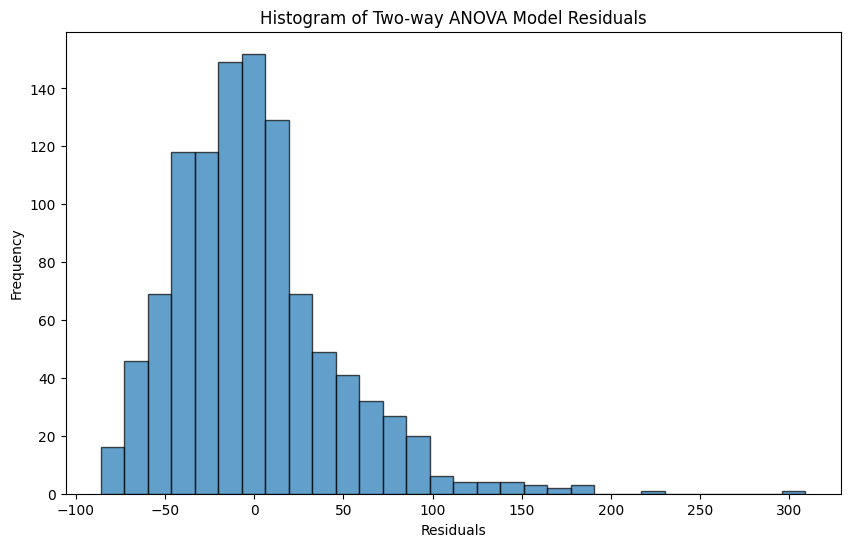

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Two-way ANOVA Model Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [25]:
anova_results_updated = sm.stats.anova_lm(two_way_anova_model, typ=2)
anova_results_updated


C:\Users\asada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\asada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\asada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covarianc

,sum_sq,df,F,PR(>F)
C(AUSPICE),3.470572e+02,2.0,0.085732,7.697322e-01
C(BUILDING_CLASS),2.527908e+05,4.0,31.223053,2.463033e-19
C(AUSPICE):C(BUILDING_CLASS),1.914627e+04,8.0,1.182410,3.098905e-01
Residual,2.123251e+06,1049.0,NaN,NaN


In [26]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var="TOTAL_SPACE", anova_model="TOTAL_SPACE ~ C(AUSPICE) + C(BUILDING_CLASS) + C(AUSPICE):C(BUILDING_CLASS)")
res.anova_summary


C:\Users\asada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\asada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\asada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covarianc

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,3.470572e+02,173.528584,0.085732,7.697322e-01
C(BUILDING_CLASS),4.0,2.527908e+05,63197.705547,31.223053,2.463033e-19
C(AUSPICE):C(BUILDING_CLASS),8.0,1.914627e+04,2393.283565,1.182410,3.098905e-01
Residual,1049.0,2.123251e+06,2024.071931,NaN,NaN


In [27]:
# Tukey test for significant factor (BUILDING_CLASS)
tukey = pairwise_tukeyhsd(endog=df["TOTAL_SPACE"], groups=df["BUILDING_CLASS"], alpha=0.05)

tukey.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Apartment,Community Centre,-1.1825,0.9999,-24.9041,22.5392,False
Apartment,Other,-3.9391,0.9664,-20.4695,12.5912,False
Apartment,Place of Worship,-13.7208,0.3007,-33.1215,5.68,False
Apartment,School,26.1185,0.0001,9.9125,42.3244,True
Community Centre,Other,-2.7567,0.9951,-22.089,16.5756,False
Community Centre,Place of Worship,-12.5383,0.5178,-34.3757,9.2991,False
Community Centre,School,27.3009,0.0009,8.2453,46.3566,True
Other,Place of Worship,-9.7816,0.2904,-23.4714,3.9081,False
Other,School,30.0576,0.0,21.4755,38.6397,True
Place of Worship,School,39.8392,0.0,26.543,53.1354,True


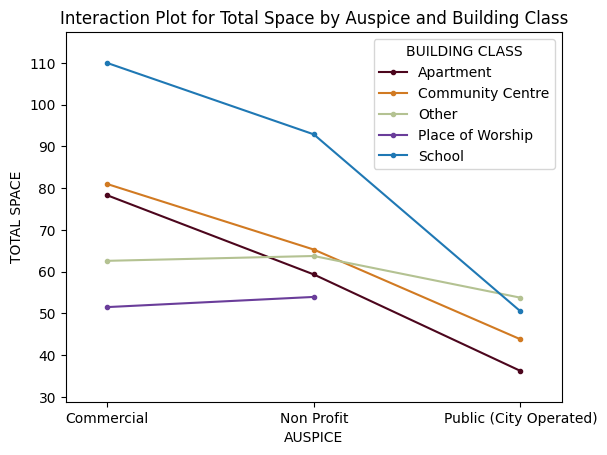

In [28]:
fig = interaction_plot(x=two_way_df_melted["AUSPICE"], trace=two_way_df_melted["BUILDING_CLASS"], response=two_way_df_melted["Total Space"],
                       colors=["#4c061d","#d17a22","#b4c292", "#6a3d9a", "#1f78b4"])

plt.title("Interaction Plot for Total Space by Auspice and Building Class")
plt.xlabel("AUSPICE")
plt.ylabel("TOTAL SPACE")
plt.legend(title="BUILDING CLASS")
plt.show()
